In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [ ]:
# Age : Age of the patient
# Sex : Sex of the patient (1=male, 0=female)
# cp : Chest Pain type
# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic
# trtbps : resting blood pressure (in mm Hg)
# chol : cholestoral in mg/dl fetched via BMI sensor
# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# rest_ecg : resting electrocardiographic results
# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach : maximum heart rate achieved
# exang: exercise induced angina (1 = yes; 0 = no)
# ca: number of major vessels (0-3)
# target : 0= less chance of heart attack 1= more chance of heart attack


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Heart Attack Outputs')

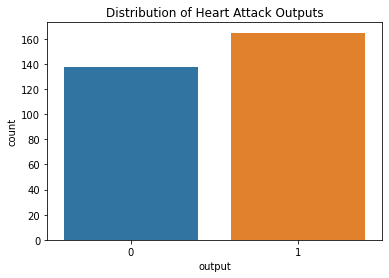

In [8]:
sns.countplot(df.output)
plt.title('Distribution of Heart Attack Outputs')

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


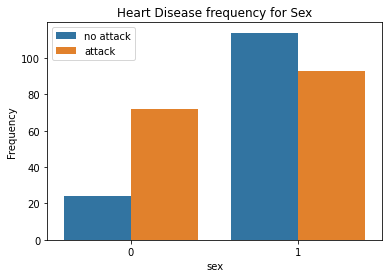

In [9]:
sns.countplot('sex',hue='output',data=df)
plt.title('Heart Disease frequency for Sex')
plt.legend(['no attack','attack'])
plt.ylabel('Frequency')
plt.show()

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


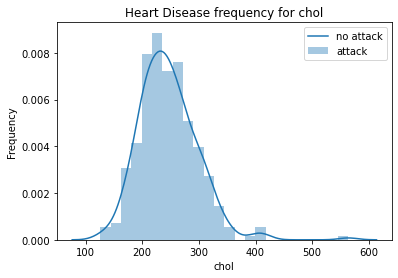

In [10]:
sns.distplot(df.chol)
plt.title('Heart Disease frequency for chol')
plt.legend(['no attack','attack'])
plt.ylabel('Frequency')
plt.show()

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


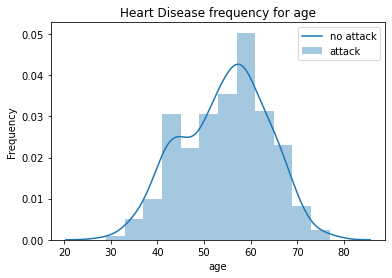

In [11]:
sns.distplot(df.age)
plt.title('Heart Disease frequency for age')
plt.legend(['no attack','attack'])
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='age', ylabel='chol'>

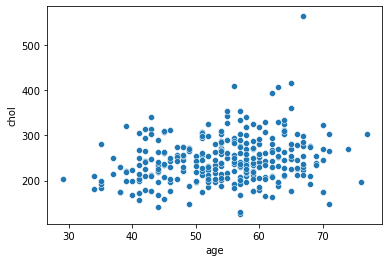

In [25]:
sns.scatterplot(x='age',y='chol', data=df)

Text(0.5, 1.0, 'Heart attack with chest-pain')

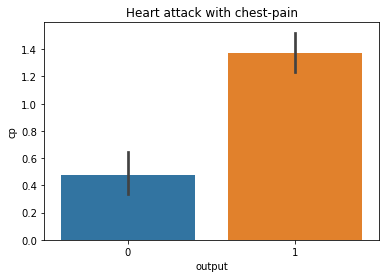

In [36]:
sns.barplot(x='output', y = 'cp', data=df)
plt.title('Heart attack with chest-pain')

C:\Users\prath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


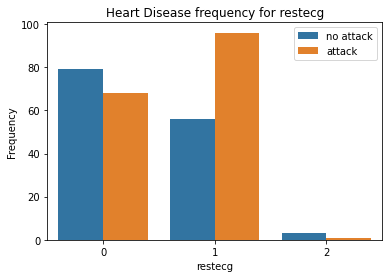

In [12]:
sns.countplot('restecg',hue='output',data=df)
plt.title('Heart Disease frequency for restecg')
plt.legend(['no attack','attack'])
plt.ylabel('Frequency')
plt.show()

In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [124]:

from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
%matplotlib inline

In [125]:
x = df.drop(['output'], axis=1)
y = df['output']

In [126]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Logistic Regression

In [127]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
yp_lr = lr.predict(x_test)
print("Logistic_Regression Accuracy: ", metrics.accuracy_score(y_test,yp_lr)*100)

Logistic_Regression Accuracy:  88.52459016393442


In [128]:
lr.score(x_test,y_test)*100

88.52459016393442

In [129]:
c = confusion_matrix(y_test,yp_lr)

<AxesSubplot:>

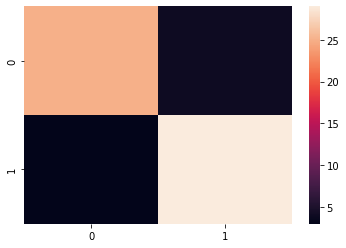

In [130]:
sns.heatmap(c)

SVM (Support Vector Machines)

In [131]:
from sklearn import svm
sv_clf = svm.SVC(kernel='linear') 
sv_clf.fit(x_train,y_train)
yp_sv_clf = sv_clf.predict(x_test)
print("Support Vector Machine Accuracy:\n", metrics.accuracy_score(y_test,yp_sv_clf)*100)

Support Vector Machine Accuracy:
 88.52459016393442


Random Forest Classifier

In [132]:
rfc = RandomForestClassifier(n_estimators=200)

In [133]:
rfc.fit(x_train,y_train)
yp_rfc = rfc.predict(x_test)
print("Random Forest Classifier:\n", metrics.accuracy_score(y_test,yp_rfc)*100)

Random Forest Classifier:
 86.88524590163934


In [134]:
from sklearn.model_selection import cross_val_score


In [135]:
rfm = cross_val_score(rfc,X=x_train, y = y_train, cv=10)

In [136]:
rfm.mean()

0.8100000000000002

Decision Tree Classifier

In [137]:
clf =DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_p = clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_p)*100)

Accuracy:  83.60655737704919


In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
kn = KNeighborsClassifier(n_neighbors=5)

In [140]:
kn.fit(x_train,y_train)
yp_kn = kn.predict(x_test)
print("KNN Accuracy:", metrics.accuracy_score(y_test,yp_kn)*100)

KNN Accuracy: 90.1639344262295


Naive Bayes Classifier

In [143]:
from sklearn.naive_bayes import GaussianNB

nv = GaussianNB()
nv.fit(x_train,y_train)
yp_nv = nv.predict(x_test)
print("Naive Bayes Accuracy: ", metrics.accuracy_score(y_test,yp_nv)*100)

Naive Bayes Accuracy:  88.52459016393442


# KNN model is working great with the given data. So, we are using KNN model for predicting the heart-attack prediction

In [150]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [154]:
a=[[25,0,1,123,200, 1, 0,122, 1, 0, 2, 0, 2]]
kn.predict(a)

array([1], dtype=int64)